In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np
import operator
import numpy as np
import datetime
from pylab import *

In [3]:
prefices = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun"
]
# twitter handles
perpertrators = []
all_authors = []

In [4]:
name_col = "Name"
gen_col = "Gender"
handle_col = "Author"
post_col = "Posts"
followers_col = "Followers"
following_col = "Following"

### 1. Number of Perpertrators v.s. Number of Authors

In [6]:
for prefix in prefices:
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/" + prefix + "-17_sentiment.csv")
    this_perpertrators = df[handle_col]
    perpertrators.extend(this_perpertrators.unique())

perpertrators = set(perpertrators)
print("There are %s pperpertrators." % len(perpertrators))

There are 16707 pperpertrators.


In [7]:
for prefix in prefices:
    df = pd.read_csv("../data/hackathon/data/" + prefix + "-17.csv", encoding="ISO-8859-1")
    authors = df[handle_col]
    all_authors.extend(authors.unique())
    
all_authors = set(all_authors)
print(len(all_authors))

354661


/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,9,10,12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
plt_list = [len(perpertrators), len(all_authors)]
labels = ["Perpertrators", "All Authors"]

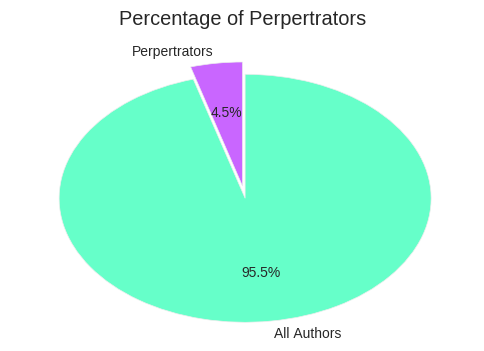

In [9]:
fig1, ax1 = plt.subplots()
explode = (0, 0.1)  # only "explode" the 1nd slice (i.e. 'White')
ax1.pie(
    plt_list,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=False,
    colors = ["#c966ff", "#66ffc9"],
    startangle=90)

plt.title("Percentage of Perpertrators")
plt.savefig('../results/network_analysis/perpertrators.png')

### 2. Volume of Abusive Tweets per Perpertrator

In [10]:
perpertrator_volume = {}
for perpertrator in perpertrators:
    perpertrator_volume[perpertrator] = 0
    
for prefix in prefices:
    df = pd.read_csv("../data/hackathon/data/workable/sentiment/" + prefix + "-17_sentiment.csv")
    for perpertrator in perpertrators:
        df_per = df[handle_col][df[handle_col] == perpertrator]
        old_volume = perpertrator_volume[perpertrator]
        perpertrator_volume[perpertrator] = old_volume + df_per.shape[0]

In [11]:
df_perpertrators = pd.DataFrame(list(perpertrator_volume.items()),
                      columns=['author','no_abusive_tweets'])

In [12]:
df_perpertrators = df_perpertrators.sort_values(by="no_abusive_tweets", ascending=False)

In [13]:
df_perpertrators.head()

,author,no_abusive_tweets
12829,@king_darran,236
12312,@DaraMiah786,66
4590,@DANGEROUS_ToyP,63
10390,@labour_zone,59
7158,@djrae1981,55


In [14]:
list((df_perpertrators.no_abusive_tweets/159).head())

[1.4842767295597483,
 0.41509433962264153,
 0.39622641509433965,
 0.37106918238993708,
 0.34591194968553457]

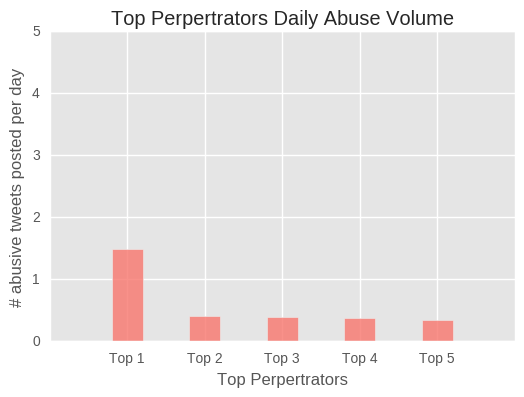

In [15]:
plt_list = list((df_perpertrators.no_abusive_tweets/159).head())
labels = ["Top 1", "Top 2", "Top 3", "Top 4", "Top 5"]

y_pos = np.arange(len(plt_list))
plt.bar(
    y_pos,
    plt_list,
    align="center",
    color = "#f8766d",
    alpha=0.8,
    width=0.4
)
plt.xticks(y_pos, labels)
plt.xlabel("Top Perpertrators")
plt.ylabel('# abusive tweets posted per day')

ylim([0,5])

plt.title("Top Perpertrators Daily Abuse Volume")
plt.savefig('../results/network_analysis/top5_perpertrator_volume_per_day_bar_chart.png')

#### Q: Are @labour_zone (Top 1) & tory_zone (Top 5) abusive?

@labour_zone tweets:
from June:
- @HackneyAbbott @theresa_may Her treatment of u has been disgusting. What a vile woman.
- @waterworth_ann @HackneyAbbott @jeremycorbyn That's stupidity and madness.
- #LabourManifesto must've been calculated by @HackneyAbbott £50 billion hole in their funds. #CorbynLies #LabourLies #VoteTory
- I wouldn't trust @HackneyAbbott to wipe my arse.
- RT @Seinneann @JoeThorpe1963 @danielh_g @edatkinson1 @HackneyAbbott Nope. You're just a bellend with a keyboard and a need to defecate your uninformed sexist, racist and idiotic opinions all over twitter.

from May:
- @NorthernKitty69 @BritishTeetotal @JaydaBF @lucyallan  When will you brainwashed fools realise your BUBBLE has burst. NWO will not happen.
- @annaturley stupid person
- @YvetteCooperMP These idiots think they can win an election spouting 16 year old feminist propaganda, deary me.
- @jessphillips @PhilipDaviesMP difference is that you're a sexist piece of shit.

### 3. Percentage of what the perpertrators tweet about MPs is abuse?

In [75]:
df_perpertrators['no_tweets'] = [0] * df_perpertrators.shape[0]
df_perpertrators.head()

,author,no_abusive_tweets,no_tweets
13167,@labour_zone,549,0
16061,@LabLondon_zone,165,0
928,@SNP_tweets,114,0
17686,@Labour_North,95,0
5664,@tory_zone,74,0


In [87]:
all_authors = []
for prefix in prefices:
    df = pd.read_csv("../data/hackathon/data/" + prefix + "-17.csv", encoding="ISO-8859-1")
    authors = df[handle_col]
    all_authors.extend(authors)
    
all_authors
print(len(all_authors))

2249564


/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,9,10,12,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
all_authors_pd = pd.Series(all_authors)
all_authors_pd.value_counts().head()

@labour_zone       32892
@LabLondon_zone     7651
@SNP_tweets         6142
@Labour_North       4517
@tory_zone          4444
dtype: int64

In [106]:
authors = all_authors_pd.value_counts()
df_perpertrators.set_index(df_perpertrators.author, inplace=True)
df_perpertrators.head()

,author,no_abusive_tweets,no_tweets
author,,,
@labour_zone,@labour_zone,549,NaN
@LabLondon_zone,@LabLondon_zone,165,NaN
@SNP_tweets,@SNP_tweets,114,NaN
@Labour_North,@Labour_North,95,NaN
@tory_zone,@tory_zone,74,NaN


In [108]:
df_perpertrators.head()

,author,no_abusive_tweets,no_tweets
author,,,
@labour_zone,@labour_zone,549,NaN
@LabLondon_zone,@LabLondon_zone,165,NaN
@SNP_tweets,@SNP_tweets,114,NaN
@Labour_North,@Labour_North,95,NaN
@tory_zone,@tory_zone,74,NaN


In [110]:
df_perpertrators.index.isin(authors.index).sum()

28822

In [111]:
df_perpertrators.shape

(46037, 3)

In [112]:
authors.shape

(354660,)

In [113]:
df_perpertrators.no_tweets.value_counts()

8.0       692
9.0       640
10.0      599
11.0      502
14.0      465
12.0      461
13.0      443
15.0      418
17.0      384
16.0      359
19.0      356
18.0      318
22.0      298
20.0      298
21.0      293
24.0      265
23.0      261
25.0      255
26.0      249
28.0      230
29.0      227
27.0      224
32.0      207
31.0      191
33.0      188
30.0      186
35.0      178
34.0      170
36.0      157
38.0      153
         ... 
432.0       1
621.0       1
659.0       1
899.0       1
415.0       1
4444.0      1
636.0       1
876.0       1
536.0       1
566.0       1
760.0       1
387.0       1
813.0       1
552.0       1
408.0       1
726.0       1
3414.0      1
454.0       1
524.0       1
517.0       1
789.0       1
490.0       1
464.0       1
724.0       1
355.0       1
343.0       1
579.0       1
357.0       1
1246.0      1
1024.0      1
Name: no_tweets, dtype: int64